In [1]:
import numpy as np
import random
from sklearn.model_selection import train_test_split


In [2]:
def generateDataSet(a, b, xmin, xmax, n, sigma, gama):
    X=np.linspace(xmin, xmax, n)
    # num_samples = 4

    # Sample with replacement (may have duplicates)
    # random_sample = np.random.choice(X, num_samples, replace=True)
    percentage=gama/100
    y_actual=a*X+b
    X_train, X_test, y_train, y_test = train_test_split(X, y_actual, test_size=percentage, random_state=42)

    y_noisy=y_test+np.random.normal(0,sigma,gama)
    # x_y=np.vstack([X, y_actual])
    # noisy=np.random.sample(x_y, 5)
    # print()
    # for y in y_actual:
    #   if random.choice([True, False]):
    #     print('chosen true')
    # y_noisy=a*X+b+np.random.normal(0,sigma)
    X_data=np.hstack([X_train, X_test])
    Y_noisy_data=np.hstack([y_train, y_noisy])

    return X_data, Y_noisy_data, y_actual, X
    print(y_noisy)

In [3]:
def pseudoInverse(X,Y,N):
    X=X.reshape(N,1)
    Y=Y.reshape(N,1)
    one_=np.ones((N,1))
    X_With_one= np.append(X,one_,axis=1)
    X_Trans_X= X_With_one.T.dot(X_With_one)
    X_Inv=np.linalg.inv(X_Trans_X)
    W_=X_Inv.dot(X_With_one.T)
    W=W_.dot(Y)
    return W

In [4]:
  
X,Y_noisy, Y_actual, X_actual=generateDataSet(3,2,-10,10,100, 10,30)


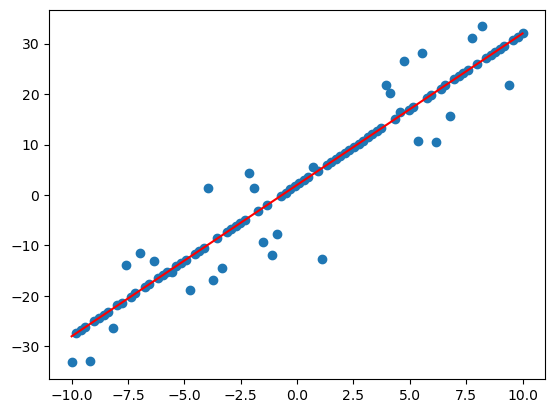

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X,Y_noisy)
plt.plot(X_actual,Y_actual, color='red')
# plt.scatter(X_test, y_noisy)
plt.show()


In [6]:
epochs=3
for itr in  range(epochs):
    print(X.shape, Y_noisy.shape)
    if len(X)<=70:
        break
    theta=pseudoInverse(X, Y_noisy, len(X))
    y_cap=theta[0]*X+theta[1]
    error=np.subtract(Y_noisy,y_cap)
    abs_error=abs(error)
    error_mean=np.mean(abs_error)
    error_std=np.std(abs_error)
    inlier=[]
    outlier=[]
    index=0
    K_const=1
    for e in error:
        ee=abs(e-error_mean)
        kk=K_const*error_std

        if ee<=kk:
            inlier.append([X[index],Y_noisy[index]])
            index=index+1
        else:
            outlier.append([X[index],Y_noisy[index]])
            index=index+1
    outlier=np.array(outlier)
    inlier=np.array(inlier)
    X, Y_noisy=inlier[:,0],inlier[:,1]

(100,) (100,)
(76,) (76,)
(72,) (72,)


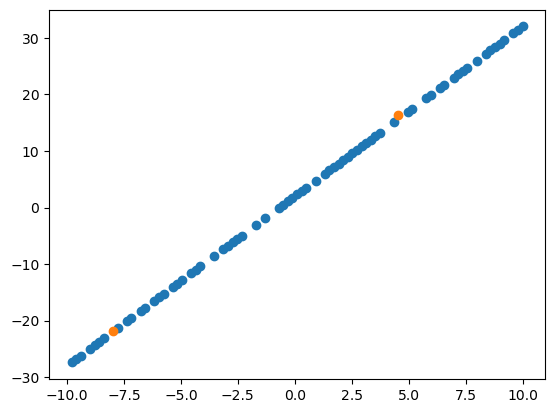

In [7]:
import matplotlib.pyplot as plt

plt.scatter(inlier[:,0],inlier[:,1])
plt.scatter(outlier[:,0],outlier[:,1])
#plt.scatter(X_test, y_noisy)
plt.show()

In [8]:
import numpy as np
import random
from sklearn.model_selection import train_test_split


In [9]:
def generateDataSet_v2(a, b, xmin, xmax, n, sigma, gama):
    X=np.linspace(xmin, xmax, n)

    percentage=gama/n
    y_actual=a*X+b+np.random.normal(0,5,n)
    X_train, X_test, y_train, y_test = train_test_split(X, y_actual, test_size=percentage, random_state=42)

    y_noisy=y_test+np.random.normal(0,sigma,gama)

    X_data=np.hstack([X_train, X_test])
    Y_noisy_data=np.hstack([y_train, y_noisy])
    return X_data, Y_noisy_data, y_actual, X


In [10]:
X,Y_noisy, Y_actual, X_actual=generateDataSet_v2(3,2,-10,10,100, 40,30)
theta=pseudoInverse(X_actual, Y_actual, len(X_actual))
y_pred=3*X_actual+2
y_pred_inliers_only=theta[0]*X_actual+theta[1]
theta=pseudoInverse(X, Y_noisy, len(X))
y_pred_with_all=theta[0]*X+theta[1]


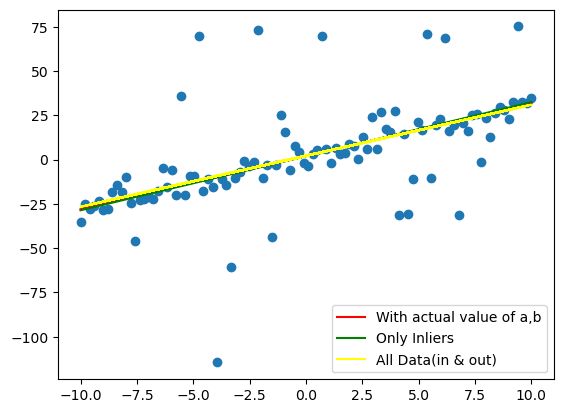

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X,Y_noisy)
plt.plot(X_actual,y_pred, color='red', label='With actual value of a,b')
plt.plot(X_actual,y_pred_inliers_only, color='green', label='Only Inliers')
plt.plot(X,y_pred_with_all, color='yellow', label='All Data(in & out)')
# plt.scatter(X_test, y_noisy)
plt.legend()
plt.show()


In [12]:
epochs=3
for itr in  range(epochs):
    print(X.shape, Y_noisy.shape)
    if len(X)<=80:
        break
    theta=pseudoInverse(X, Y_noisy, len(X))
    y_cap=theta[0]*X+theta[1]
    error=np.subtract(Y_noisy,y_cap)
    abs_error=abs(error)
    error_mean=np.mean(abs_error)
    error_std=np.std(abs_error)
    inlier=[]
    outlier=[]
    index=0
    K_const=1
    for e in error:
        ee=abs(e-error_mean)
        kk=K_const*error_std

        if ee<=kk:
            inlier.append([X[index],Y_noisy[index]])
            index=index+1
        else:
            outlier.append([X[index],Y_noisy[index]])
            index=index+1
    outlier=np.array(outlier)
    inlier=np.array(inlier)
    X, Y_noisy=inlier[:,0],inlier[:,1]
    y_pred=X*theta[0]+theta[1]


(100,) (100,)
(80,) (80,)


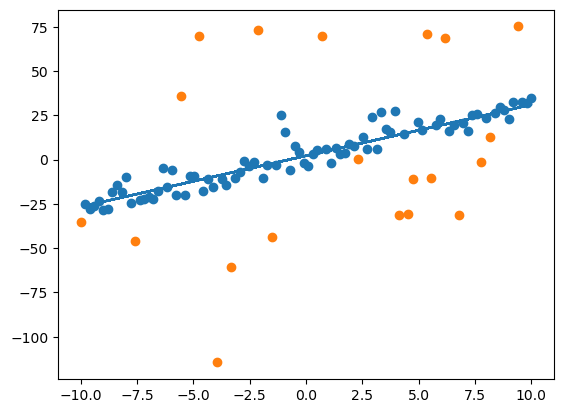

In [13]:
import matplotlib.pyplot as plt

plt.scatter(inlier[:,0],inlier[:,1], label='Inliers')
plt.scatter(outlier[:,0],outlier[:,1], label='Ouliers')
plt.plot(X, y_pred, label='Reg. Line')
# plt.scatter(X_test, y_noisy)
plt.show()
